In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [53]:
data_folder = '../radio-astronomy/sun_azimuth/'
az_files = glob.glob(data_folder + "sun*")
az_files.sort()

In [54]:
az_spectra = []

for az_file in az_files:
    with open(az_file) as az_data:
        
        spectrum_rows = []
        
        for j, row in enumerate(az_data, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val) 
                    
            tot_spectrum = tot_spectrum + np.float64(spec)
            
        az_spectra.append(tot_spectrum)

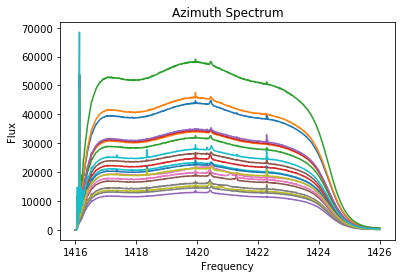

In [55]:
frequency = np.arange(1416,1426,0.009766)

for i in range(0,20):
    plt.plot(frequency, az_spectra[i])
plt.xlabel(r'Frequency')
plt.ylabel(r'Flux')
plt.title(r'Azimuth Spectrum')
plt.show()

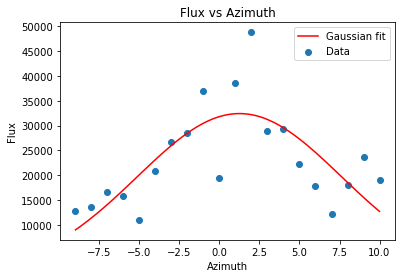

[  3.24221210e+04   1.24611550e+00   6.39085390e+00]
FWHM =  15.0493108624 degrees


In [99]:
flux = []
for i in range(len(az_spectra)):
    flux.append(np.asarray(az_spectra[i][100:900]).mean())

azimuth = [-1, -2, -3, -4, -5, -6, -7, -8, -9, 0, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9]

mean = 0
sigma = 7
a = 1000.
x0=0
az = np.linspace(-9, 10, 100)

def gauss(az, a, x0, sigma):
    return a * np.exp(-(az - x0)**2 / (2 * sigma**2))
popt, pcov = curve_fit(gauss, azimuth, flux, p0 = [a, x0, sigma], maxfev=100000)

plt.scatter(azimuth, flux, label = 'Data')
plt.plot(az, gauss(az, *popt), 'r', label = 'Gaussian fit')

plt.legend(loc = 1)
plt.ylabel(r'Flux')
plt.xlabel(r'Azimuth')
plt.title(r'Flux vs Azimuth')
plt.show()

print (popt)
FWHM = 2 * np.sqrt(2 * np.log(2)) * popt[2]
print ('FWHM = ', FWHM, 'degrees')

In [70]:
data_folder1 = '../radio-astronomy/sun_elevation/'
el_files = glob.glob(data_folder1 + "sun_el*")
el_files.sort()

In [63]:
el_spectra = []

for el_file in el_files:
    with open(el_file) as el_data:
        
        spectrum_rows = []
        
        for j, row in enumerate(el_data, start=1):
            if j%4 == 0:
                spectrum_rows.append(row)
                
        tot_spectrum = np.zeros(1024)
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = []
            for val in temp_spec:
                if val != '' and val != '\n':
                    spec.append(val) 
                    
            tot_spectrum = tot_spectrum + np.float64(spec)
            
        el_spectra.append(tot_spectrum)

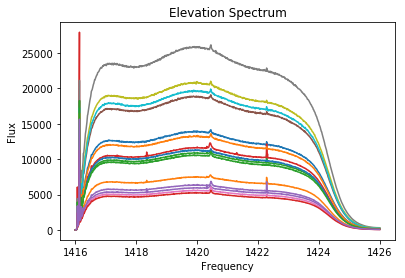

In [64]:
frequency = np.arange(1416,1426,0.009766)

for i in range(0,15):
    plt.plot(frequency, el_spectra[i])
plt.xlabel(r'Frequency')
plt.ylabel(r'Flux')
plt.title(r'Elevation Spectrum')
plt.show()

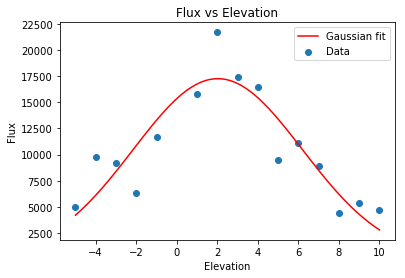

[  1.72576929e+04   2.02237987e+00   4.17979723e+00]
FWHM =  9.84267029595 degrees


In [100]:
flux_el = []
for i in range(len(el_spectra)):
    flux_el.append(np.asarray(el_spectra[i][100:900]).mean())
    
elevation = [-1, -2, -3, -4, -5, 1, 10, 2, 3, 4, 5, 6, 7, 8, 9]

mean = 2
sigma = 4
a = 100.
x0=0
el = np.linspace(-5, 10, 100)

def gauss(az, a, x0, sigma):
    return a * np.exp(-(az - x0)**2 / (2 * sigma**2))
popt, pcov = curve_fit(gauss, elevation, flux_el, p0 = [a, x0, sigma], maxfev=100000)

plt.scatter(elevation, flux_el, label = 'Data')
plt.plot(el, gauss(el, *popt), 'r', label = 'Gaussian fit')

plt.legend(loc = 1)
plt.ylabel(r'Flux')
plt.xlabel(r'Elevation')
plt.title(r'Flux vs Elevation')
plt.show()

print (popt)

FWHM = 2 * np.sqrt(2 * np.log(2)) * popt[2]
print ('FWHM = ', FWHM, 'degrees')